<a href="https://colab.research.google.com/github/elyasncr/Curso_Machine_learning/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [9]:
base = pd.read_csv("insurance.csv")
base.drop(columns=["Unnamed: 0"])
base

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,19997,False,Adult,Middle,Normal,Older,None,Tank,None,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,19998,False,Senior,UpperMiddle,Normal,Current,None,Football,None,Luxury,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,19999,False,Adult,Middle,Normal,Older,None,Football,None,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [15]:
base.drop(columns=["Unnamed: 0"])

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,None,Football,None,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,None,Football,None,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,None,EggShell,None,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,Poor,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,False,Adult,Middle,Normal,Older,None,Tank,None,FamilySedan,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,False,Senior,UpperMiddle,Normal,Current,None,Football,None,Luxury,Excellent,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,False,Adult,Middle,Normal,Older,None,Football,None,FamilySedan,Excellent,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [16]:
base.shape

(20000, 28)

In [19]:
y = base.iloc[:,8].values
X = base.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]].values

In [20]:
X

array([[1, False, 'Adult', ..., False, 'Thousand', 'Many'],
       [2, False, 'Senior', ..., True, 'Thousand', 'Zero'],
       [3, False, 'Senior', ..., True, 'Thousand', 'One'],
       ...,
       [19998, False, 'Senior', ..., True, 'Thousand', 'Zero'],
       [19999, False, 'Adult', ..., True, 'Thousand', 'Zero'],
       [20000, False, 'Adult', ..., True, 'Thousand', 'Zero']],
      dtype=object)

In [21]:
labelencoder = LabelEncoder()

In [22]:
for i in range(X.shape[1]):
    if X[:,i].dtype == 'object':
        X[:,i] = labelencoder.fit_transform(X[:,i])

In [23]:
X

array([[0, 0, 1, ..., 0, 3, 0],
       [1, 0, 2, ..., 1, 3, 2],
       [2, 0, 2, ..., 1, 3, 1],
       ...,
       [19997, 0, 2, ..., 1, 3, 2],
       [19998, 0, 1, ..., 1, 3, 2],
       [19999, 0, 1, ..., 1, 3, 2]], dtype=object)

In [24]:
# X -> variaveis independentes
# y -> variavel dependente
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y,test_size=0.3, random_state=1)


In [25]:
modelo = GaussianNB()
modelo.fit(X_treinamento, y_treinamento)

GaussianNB()

In [26]:
previsoes = modelo.predict(X_teste)

In [27]:
previsoes

array(['None', 'None', 'None', ..., 'None', 'Mild', 'None'], dtype='<U8')

In [33]:
acuracia = accuracy_score(y_teste, previsoes)
precisao = precision_score(y_teste, previsoes, average = None)
recall = recall_score(y_teste, previsoes, average='weighted')
f1 = f1_score(y_teste, previsoes, average='weighted')

#classification_report

In [35]:
acuracia


0.924

In [36]:
precisao


array([0.71302817, 0.74559194, 0.97447796, 0.88689655])

In [37]:
recall


0.924

In [38]:
f1

0.9216029066113481

In [39]:
report = classification_report(y_teste, previsoes)
print(report)

              precision    recall  f1-score   support

        Mild       0.71      0.75      0.73       542
    Moderate       0.75      0.59      0.66       505
        None       0.97      0.99      0.98      4228
      Severe       0.89      0.89      0.89       725

    accuracy                           0.92      6000
   macro avg       0.83      0.80      0.81      6000
weighted avg       0.92      0.92      0.92      6000



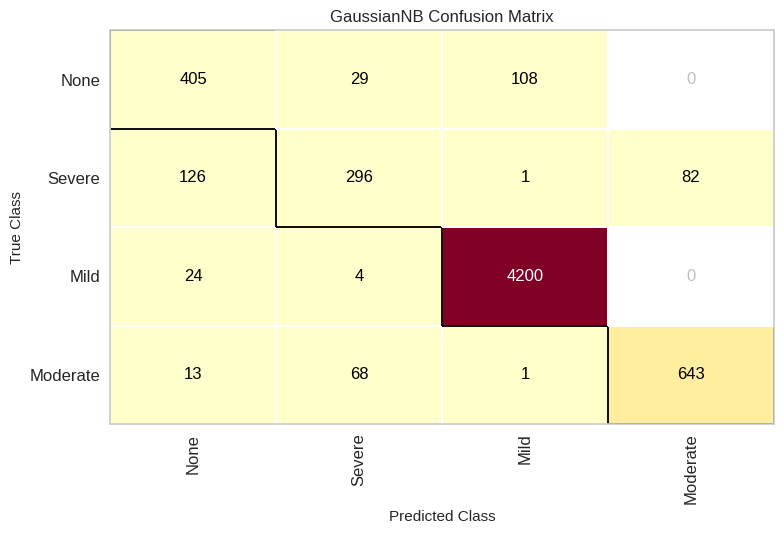

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [40]:
matriz_confusao = ConfusionMatrix(modelo, classes=['None', 'Severe', 'Mild', 'Moderate'])
matriz_confusao.fit(X_treinamento, y_treinamento)
matriz_confusao.score(X_teste, y_teste)
matriz_confusao.poof()